In [1]:
## Importing the depedencies

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import optimize
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


In [3]:
df = pd.read_csv("wage2.csv")
df.head()

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2,8,8,6.645091
1,808,50,119,41,18,11,16,37,1,0,0,1,1,.,14,14,6.694562
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2,14,14,6.715384
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3,12,12,6.476973
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6,6,11,6.331502


In [21]:
df['intercept'] = 1
df_new = df[['educ','IQ','intercept']]
df_new.head()

,educ,IQ,intercept
0,12,93,1
1,18,119,1
2,14,108,1
3,12,96,1
4,11,74,1


In [62]:
Y =df[['educ']]
X = df[['IQ']]
i = df[['intercept']]

model = sm.OLS(Y,sm.add_constant(X)).fit()
# model = sm.OLS(Y, i, missing='drop').fit()
# # model_result = model.fit()
model_result.summary()

# print(model.params)

print('Parameters: ', model.params)
print('R2: ', model.rsquared)


Parameters:  const    5.846300
IQ       0.075256
dtype: float64
R2:  0.26594340844507314


In [63]:
y = np.array(df_new['IQ'])
x = np.array(df_new['educ'])
intercept,delta1_tilda = sm.OLS(y,sm.add_constant(x)).fit().params
print(f'intercept : {intercept:.2f}, delta1_tilda : {delta1_tilda:.2f}')

intercept : 53.69, delta1_tilda : 3.53


### 3b

In [108]:
y = np.array(df['wage'])
y = np.log(y)
x = np.array(df['educ'])

i, b_1_tilda = sm.OLS(y, sm.add_constant(x)).fit().params
print(f'i : {i:.2f}, b_1_tilda : {b_1_tilda:.2f}')


i : 5.97, b_1_tilda : 0.06


In [109]:
#fit the model
fit = np.polyfit(y, x,1)
fit


array([1.6279762 , 2.43239241])

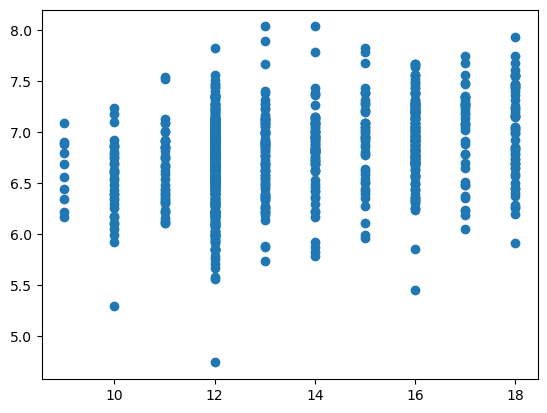

In [110]:
plt.scatter(x, y)
plt.show()


## 3C

In [103]:
y = np.array(df['wage'])
y = np.log(y)
x = np.array(df[['educ','IQ']])
i, b_1, b_2 = sm.OLS(y, sm.add_constant(x)).fit().params
print(f'i : {i:.2f}, b_1 : {b_1:.2f}, b_2 : {b_2:.2f}')


i : 5.66, b_1 : 0.04, b_2 : 0.01


In [111]:
print(intercept)
print(b_1_tilda)
print(b_1)
print(b_2)

53.68715405958723
0.05983920788637114
0.03911990143646366
0.00586313184717955


In [115]:
z = b_1 + b_2*delta1_tilda
z

0.05983920788637103

In [116]:
print(z)
print(b_1_tilda)

0.05983920788637103
0.05983920788637114


## 4a

In [118]:
## ?Importing Data

df = pd.read_csv("htv.csv")
df.head()

,wage,abil,educ,ne,nc,west,south,exper,motheduc,fatheduc,...,ne18,nc18,south18,west18,urban18,tuit17,tuit18,lwage,expersq,ctuit
0,12.019230,5.027738,15,0,0,1,0,9,12,12,...,1,0,0,0,1,7.582914,7.260242,2.486508,81,-0.322671
1,8.912656,2.037170,13,1,0,0,0,8,12,10,...,1,0,0,0,1,8.595144,9.499537,2.187472,64,0.904392
2,15.514330,2.475895,15,1,0,0,0,11,12,16,...,1,0,0,0,1,7.311346,7.311346,2.741764,121,0.000000
3,13.333330,3.609240,15,1,0,0,0,6,12,12,...,1,0,0,0,1,9.499537,10.162070,2.590267,36,0.662534
4,11.070110,2.636546,13,1,0,0,0,15,12,15,...,1,0,0,0,1,7.311346,7.311346,2.404249,225,0.000000


In [124]:
#  𝑒𝑑𝑢𝑐 = 𝛽0 + 𝛽1𝑚𝑜𝑡ℎ𝑒𝑑𝑢𝑐 + 𝛽2𝑓𝑎𝑡ℎ𝑒𝑑𝑢𝑐 + 𝛽3𝑎𝑏𝑖𝑙 + 𝛽4𝑎𝑏𝑖𝑙2 + 𝑢

y = np.array(df['educ'])
df['abil_2'] = df['abil']**2
x = np.array(df[['motheduc','fatheduc', 'abil', 'abil_2']])
model = sm.OLS(y, sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     244.9
Date:                Fri, 08 Mar 2024   Prob (F-statistic):          1.34e-154
Time:                        17:39:03   Log-Likelihood:                -2436.6
No. Observations:                1230   AIC:                             4883.
Df Residuals:                    1225   BIC:                             4909.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2402      0.287     28.671      0.000       7.676       8.804
x1             0.1901      0.028      6.767      0.000       0.135       0.245
x2             0.1089      0.020      5.558      0.000       0.070       0.147
x3             0.4015      0.030     13.255      0.000       0.342       0.461
x4             0.0506      0.008      6.093      0.000       0.034       0.067
==============================================================================
Omnibus:                       45.933   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.769
Skew:                           0.404   Prob(JB):                     4.71e-13
Kurtosis:                       3.674   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
print(model.summary())
resid_ur = model.resid
ssr_ur = ((model.resid - model.resid.mean())**2).sum()
print(ssr_ur)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     244.9
Date:                Fri, 08 Mar 2024   Prob (F-statistic):          1.34e-154
Time:                        17:41:20   Log-Likelihood:                -2436.6
No. Observations:                1230   AIC:                             4883.
Df Residuals:                    1225   BIC:                             4909.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2402      0.287     28.671      0.0

## 4b

In [130]:
x = np.array(df[['motheduc','fatheduc', 'abil', 'abil_2','tuit17','tuit18']])
model = sm.OLS(y, sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     163.5
Date:                Fri, 08 Mar 2024   Prob (F-statistic):          1.43e-152
Time:                        17:54:22   Log-Likelihood:                -2435.8
No. Observations:                1230   AIC:                             4886.
Df Residuals:                    1223   BIC:                             4921.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0819      0.313     25.840      0.000       7.468       8.695
x1             0.1929      0.028      6.845      0.000       0.138       0.248
x2             0.1084      0.020      5.528      0.000       0.070       0.147
x3             0.3990      0.030     13.148      0.000       0.340       0.459
x4             0.0506      0.008      6.082      0.000       0.034       0.067
x5             0.0158      0.063      0.252      0.801      -0.107       0.138
x6          6.027e-05      0.064      0.001      0.999      -0.125       0.125
==============================================================================
Omnibus:                       45.849   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.347
Skew:                           0.406   Prob(JB):                     5.81e-13
Kurtosis:                       3.663   Cond. No.                         146.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
df['mf'] = df['motheduc'] + df['fatheduc']
y = df['educ']
x = df[['mf','abil','abil_2']]
ols = sm.OLS(y,sm.add_constant(x)).fit()
print(ols.summary())
resid_r = ols.resid
ssr_r = ((ols.resid - ols.resid.mean())**2).sum()
print(ssr_r)


                            OLS Regression Results                            
Dep. Variable:                   educ   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     324.6
Date:                Fri, 08 Mar 2024   Prob (F-statistic):          4.43e-155
Time:                        18:19:04   Log-Likelihood:                -2438.5
No. Observations:                1230   AIC:                             4885.
Df Residuals:                    1226   BIC:                             4905.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4566      0.265     31.902      0.0

In [133]:
F_stat = (ssr_r -ssr_ur)/(ssr_ur/(1230-5))
print(F_stat)

3.746765072466699


## 4C

In [134]:
y = df['educ']
x = df[['motheduc','fatheduc','abil','abil_2','tuit17','tuit18']]
ols = sm.OLS(y,sm.add_constant(x)).fit()
print(ols.summary())
resid_ur = ols.resid
ssr_ur = ((ols.resid - ols.resid.mean())**2).sum()
print(ssr_ur)

                            OLS Regression Results                            
Dep. Variable:                   educ   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     163.5
Date:                Fri, 08 Mar 2024   Prob (F-statistic):          1.43e-152
Time:                        18:22:41   Log-Likelihood:                -2435.8
No. Observations:                1230   AIC:                             4886.
Df Residuals:                    1223   BIC:                             4921.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0819      0.313     25.840      0.0

In [136]:
# 

y = df['educ']
df['tuit'] = df['tuit17'] + df['tuit18']
x = df[['motheduc','fatheduc','abil','abil_2']]
ols = sm.OLS(y,sm.add_constant(x)).fit()
print(ols.summary())
resid_r = ols.resid
ssr_r = ((ols.resid - ols.resid.mean())**2).sum()
print(ssr_r)

                            OLS Regression Results                            
Dep. Variable:                   educ   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     244.9
Date:                Fri, 08 Mar 2024   Prob (F-statistic):          1.34e-154
Time:                        18:24:27   Log-Likelihood:                -2436.6
No. Observations:                1230   AIC:                             4883.
Df Residuals:                    1225   BIC:                             4909.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2402      0.287     28.671      0.0

In [137]:
F_stat = ((ssr_r -ssr_ur)/2)/(ssr_ur/(1230-7))
print(F_stat)

0.8393298662948773


In [139]:
## 

y = df['tuit18']
x = df['tuit17']
olsrsqd = sm.OLS(y,sm.add_constant(x)).fit().rsquared
print(f'R^2 from the OLS regression is {olsrsqd:.3f}')
corr_coeff = np.cov(y,x)[0][1]/(y.std()*x.std())
print(f'correlation coefficient between tuit18 and tuit17 is {corr_coeff:.3f}')

R^2 from the OLS regression is 0.962
correlation coefficient between tuit18 and tuit17 is 0.981


In [140]:
df['tuit'] = (df['tuit17']+df['tuit18'])/2
y = df['educ']
df['tuit'] = df['tuit17'] + df['tuit18']
x = df[['motheduc','fatheduc','abil','abil_2','tuit']]
ols = sm.OLS(y,sm.add_constant(x)).fit()
print(ols.summary())


                            OLS Regression Results                            
Dep. Variable:                   educ   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     196.4
Date:                Fri, 08 Mar 2024   Prob (F-statistic):          9.75e-154
Time:                        18:27:58   Log-Likelihood:                -2435.8
No. Observations:                1230   AIC:                             4884.
Df Residuals:                    1224   BIC:                             4914.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0813      0.313     25.851      0.0

In [143]:
pip install pandoc

Note: you may need to restart the kernel to use updated packages.
